In [53]:
import get_data
import cv2
import numpy as np
from PIL import Image, ImageStat
from tqdm import tqdm
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
real_images, fake_images = get_data.get_images("data/dataset2/")

#real_images, fake_images = get_data.get_images("data/dataset1/train/")
#test_real_images, test_fake_images = get_data.get_images("data/dataset1/test/")

# Add the training images to the list of real and fake images
#real_images += test_real_images
#fake_images += test_fake_images

In [55]:
def print_stats(data, label):
    print(f"Stats for {label}:")
    print("Mean:", np.mean(data))
    print("Median:", np.median(data))
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    print("Q1:", q1)
    print("Q3:", q3)
    print("Range:", np.ptp(data))
    print("IQR:", stats.iqr(data))
    print()

In [56]:
def get_brightness(image_path):
    image = Image.open(image_path).convert('L')
    stat = ImageStat.Stat(image)
    return stat.mean[0]

def get_contrast(image_path):
    image = cv2.imread(image_path, 0)
    return cv2.Laplacian(image, cv2.CV_64F).var()

def get_saturation(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return np.mean(hsv[:,:,1])

def get_unique_pixel_values(image_path):
    image = cv2.imread(image_path)
    unique_values = np.unique(image.reshape(-1, image.shape[2]), axis=0)
    return len(unique_values)

def get_color_range(image_path):
    image = cv2.imread(image_path)
    blue, green, red = cv2.split(image)
    return np.ptp(red), np.ptp(green), np.ptp(blue)

# LOADING DATA + HYPOTHESIS TEST

In [57]:
real_brightness = [get_brightness(image) for image in tqdm(real_images)]
fake_brightness = [get_brightness(image) for image in tqdm(fake_images)]

print_stats(real_brightness, "Real Images Brightness")
print_stats(fake_brightness, "Fake Images Brightness")

t_stat, p_value = stats.ttest_ind(real_brightness, fake_brightness)
print("T statistic:", t_stat)
print("P value:", p_value)

 69%|██████▉   | 286/413 [00:10<00:02, 48.99it/s]c:\Users\garrido-lestacheh\AppData\Local\Programs\Python\Python310\lib\site-packages\PIL\Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
100%|██████████| 500/500 [00:11<00:00, 42.34it/s]

Stats for Real Images Brightness:
Mean: 121.23618581769723
Median: 120.34476673713883
Q1: 94.79142771565495
Q3: 144.98996998856708
Range: 209.0774568231583
IQR: 50.198542272912135

Stats for Fake Images Brightness:
Mean: 100.80327711613211
Median: 98.31378040736796
Q1: 78.03909678024007
Q3: 119.70490129013804
Range: 212.8861106086134
IQR: 41.66580450989797

T statistic: 8.459678791295367
P value: 1.0588865695351478e-16


In [58]:
real_contrast = [get_contrast(image) for image in tqdm(real_images)]
fake_contrast = [get_contrast(image) for image in tqdm(fake_images)]

print_stats(real_contrast, "Real Images Contrast")
print_stats(fake_contrast, "Fake Images Contrast")

t_stat, p_value = stats.ttest_ind(real_contrast, fake_contrast)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 500/500 [00:15<00:00, 31.50it/s]

Stats for Real Images Contrast:
Mean: 1524.4466016866934
Median: 802.3723058158946
Q1: 281.24734917203995
Q3: 1810.2072635080149
Range: 21202.84879169288
IQR: 1528.9599143359749

Stats for Fake Images Contrast:
Mean: 1052.0824620258195
Median: 558.5434642036732
Q1: 230.6646931325609
Q3: 1229.7248844695064
Range: 13228.824997278623
IQR: 999.0601913369455

T statistic: 3.894210405991209
P value: 0.00010571494656664941


In [59]:
real_saturation = [get_saturation(image) for image in tqdm(real_images)]
fake_saturation = [get_saturation(image) for image in tqdm(fake_images)]

print_stats(real_saturation, "Real Images Saturation")
print_stats(fake_saturation, "Fake Images Saturation")

t_stat, p_value = stats.ttest_ind(real_contrast, fake_contrast)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 500/500 [00:17<00:00, 28.48it/s]

Stats for Real Images Saturation:
Mean: 90.95922678077994
Median: 91.9325899782811
Q1: 61.979262034098305
Q3: 119.2796875
Range: 227.71913975694446
IQR: 57.30042546590169

Stats for Fake Images Saturation:
Mean: 107.53269722982891
Median: 106.3235603330134
Q1: 79.86855360595924
Q3: 132.69680826308982
Range: 218.62242518537033
IQR: 52.828254657130586

T statistic: 3.894210405991209
P value: 0.00010571494656664941


In [60]:

real_unique_pixels = [get_unique_pixel_values(image) for image in tqdm(real_images)]
fake_unique_pixels = [get_unique_pixel_values(image) for image in tqdm(fake_images)]

print_stats(real_unique_pixels, "Real Images Unique Pixels")
print_stats(fake_unique_pixels, "Fake Images Unique Pixels")

t_stat, p_value = stats.ttest_ind(real_unique_pixels, fake_unique_pixels)
print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 500/500 [19:18<00:00,  2.32s/it]  

Stats for Real Images Unique Pixels:
Mean: 139114.39709443098
Median: 100701.0
Q1: 41068.0
Q3: 195326.0
Range: 1086539
IQR: 154258.0

Stats for Fake Images Unique Pixels:
Mean: 190040.052
Median: 141685.0
Q1: 69350.0
Q3: 253133.0
Range: 1332064
IQR: 183783.0

T statistic: -4.781988635618459
P value: 2.0233316801605393e-06


In [61]:

real_color_range = [get_color_range(image) for image in tqdm(real_images)]
fake_color_range = [get_color_range(image) for image in tqdm(fake_images)]

real_color_range_avg = np.mean([np.mean(ranges) for ranges in real_color_range])
fake_color_range_avg = np.mean([np.mean(ranges) for ranges in fake_color_range])

t_stat, p_value = stats.ttest_ind([np.mean(ranges) for ranges in real_color_range], [np.mean(ranges) for ranges in fake_color_range])

print_stats([np.mean(ranges) for ranges in real_color_range], "Real Images Color Range")
print_stats([np.mean(ranges) for ranges in fake_color_range], "Fake Images Color Range")

print("T statistic:", t_stat)
print("P value:", p_value)

100%|██████████| 500/500 [00:13<00:00, 36.95it/s]

Stats for Real Images Color Range:
Mean: 251.7328490718321
Median: 255.0
Q1: 253.66666666666666
Q3: 255.0
Range: 66.33333333333334
IQR: 1.3333333333333428

Stats for Fake Images Color Range:
Mean: 252.56
Median: 255.0
Q1: 253.91666666666666
Q3: 255.0
Range: 85.66666666666666
IQR: 1.0833333333333428

T statistic: -1.5786797761459401
P value: 0.11475666732729457


# GRAPHS

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\575613453.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\575613453.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

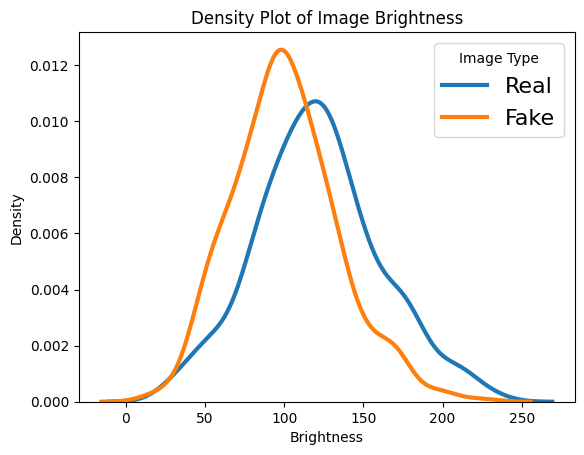

In [62]:
sns.distplot(real_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_brightness, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Brightness')
plt.xlabel('Brightness')
plt.ylabel('Density')

plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\2681496380.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\2681496380.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/

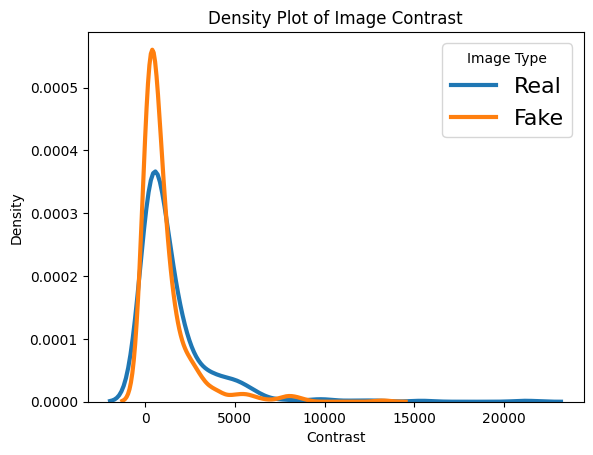

In [63]:
sns.distplot(real_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_contrast, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Contrast')
plt.xlabel('Contrast')
plt.ylabel('Density')

plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\4267300173.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_saturation, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\4267300173.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.co

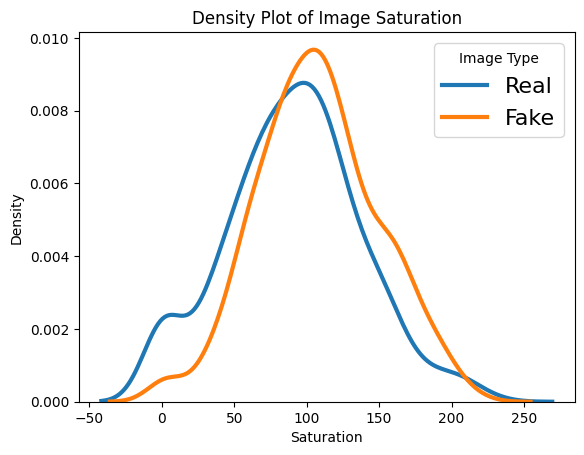

In [64]:
sns.distplot(real_saturation, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_saturation, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of Image Saturation')
plt.xlabel('Saturation')
plt.ylabel('Density')

plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\2854691290.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(real_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\2854691290.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github

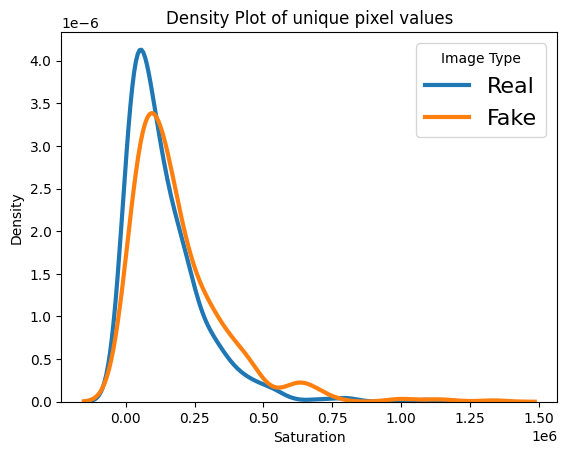

In [65]:
sns.distplot(real_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
sns.distplot(fake_unique_pixels, hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')

plt.legend(prop={'size': 16}, title = 'Image Type')
plt.title('Density Plot of unique pixel values')
plt.xlabel('Saturation')
plt.ylabel('Density')

plt.show()

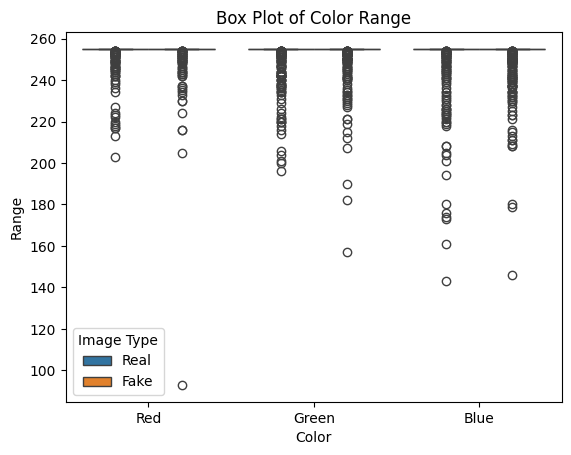

In [66]:
import pandas as pd

# Prepare data for boxplot
data = []
for ranges, label in zip([real_color_range, fake_color_range], ['Real', 'Fake']):
    for color, color_name in zip(zip(*ranges), ['Red', 'Green', 'Blue']):
        for value in color:
            data.append([label, color_name, value])

df = pd.DataFrame(data, columns=['Image Type', 'Color', 'Range'])

# Create boxplot
sns.boxplot(x='Color', y='Range', hue='Image Type', data=df)

plt.title('Box Plot of Color Range')
plt.show()

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(color_df[color_df['Image Type'] == 'Real']['Range'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functi

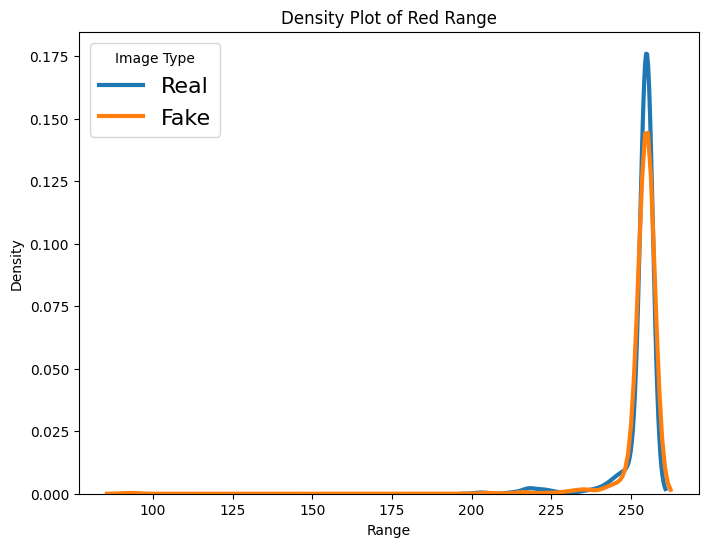

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(color_df[color_df['Image Type'] == 'Real']['Range'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functi

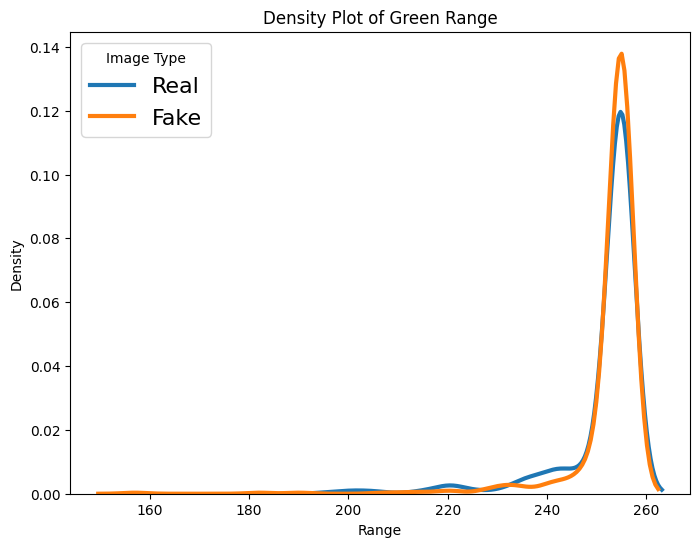

C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(color_df[color_df['Image Type'] == 'Real']['Range'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
C:\Users\garrido-lestacheh\AppData\Local\Temp\ipykernel_45312\1132978627.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functi

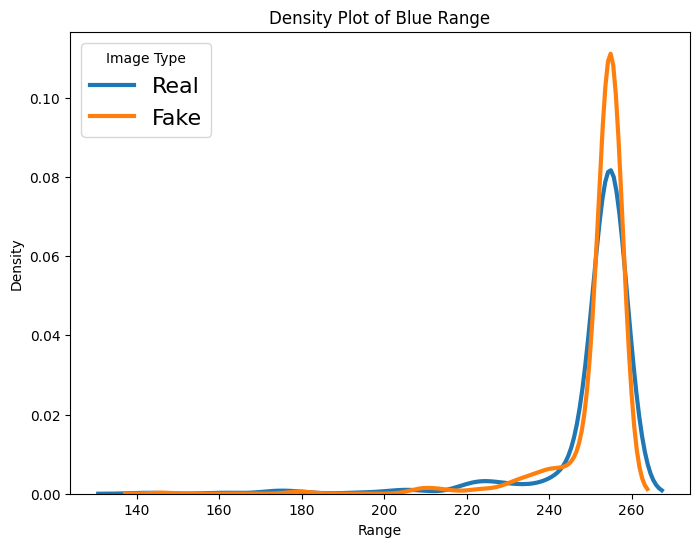

In [67]:
# Prepare data for line plots
data_red = []
data_green = []
data_blue = []
for ranges, label in zip([real_color_range, fake_color_range], ['Real', 'Fake']):
    for color, color_name in zip(zip(*ranges), ['Red', 'Green', 'Blue']):
        if color_name == 'Red':
            data_red.extend([(label, value) for value in color])
        elif color_name == 'Green':
            data_green.extend([(label, value) for value in color])
        else:
            data_blue.extend([(label, value) for value in color])

df_red = pd.DataFrame(data_red, columns=['Image Type', 'Range'])
df_green = pd.DataFrame(data_green, columns=['Image Type', 'Range'])
df_blue = pd.DataFrame(data_blue, columns=['Image Type', 'Range'])

# Create separate plots for each color
for color_df, color in zip([df_red, df_green, df_blue], ['Red', 'Green', 'Blue']):
    plt.figure(figsize=(8, 6))
    sns.distplot(color_df[color_df['Image Type'] == 'Real']['Range'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Real')
    sns.distplot(color_df[color_df['Image Type'] == 'Fake']['Range'], hist = False, kde = True, kde_kws = {'linewidth': 3}, label = 'Fake')
    plt.legend(prop={'size': 16}, title = 'Image Type')
    plt.title(f'Density Plot of {color} Range')
    plt.xlabel('Range')
    plt.ylabel('Density')
    plt.show()

# CORRELATION TEST

Real Images Correlation Matrix:
               Brightness  Contrast  Saturation  Unique Pixels  Red Range  Green Range  Blue Range
Brightness       1.000000  0.047759   -0.185622      -0.024605   0.004528     0.032942    0.094495
Contrast         0.047759  1.000000    0.063693       0.020549   0.119884     0.140687    0.138665
Saturation      -0.185622  0.063693    1.000000       0.369991   0.172601     0.126556   -0.007257
Unique Pixels   -0.024605  0.020549    0.369991       1.000000   0.197094     0.192116    0.190936
Red Range        0.004528  0.119884    0.172601       0.197094   1.000000     0.723291    0.448252
Green Range      0.032942  0.140687    0.126556       0.192116   0.723291     1.000000    0.700873
Blue Range       0.094495  0.138665   -0.007257       0.190936   0.448252     0.700873    1.000000

Fake Images Correlation Matrix:
               Brightness  Contrast  Saturation  Unique Pixels  Red Range  Green Range  Blue Range
Brightness       1.000000  0.042984   -0.406

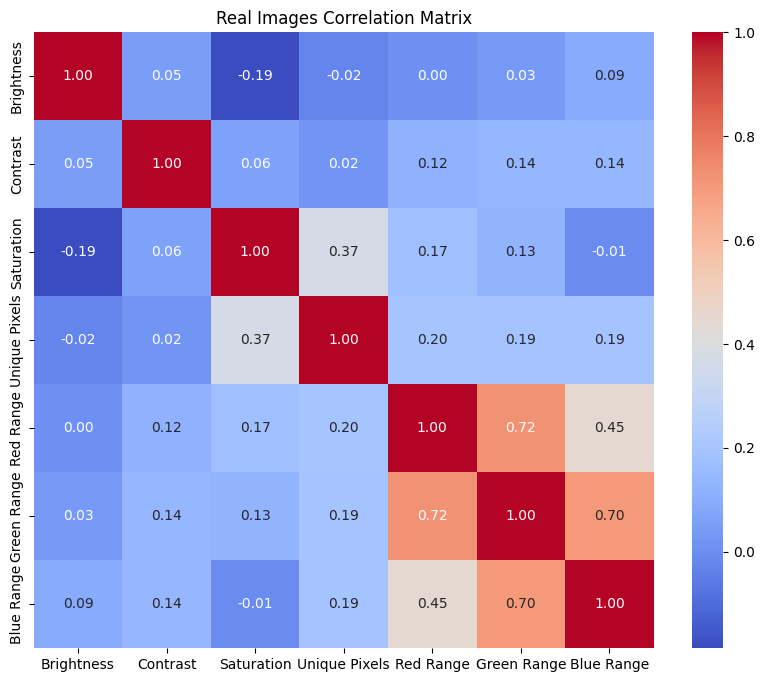

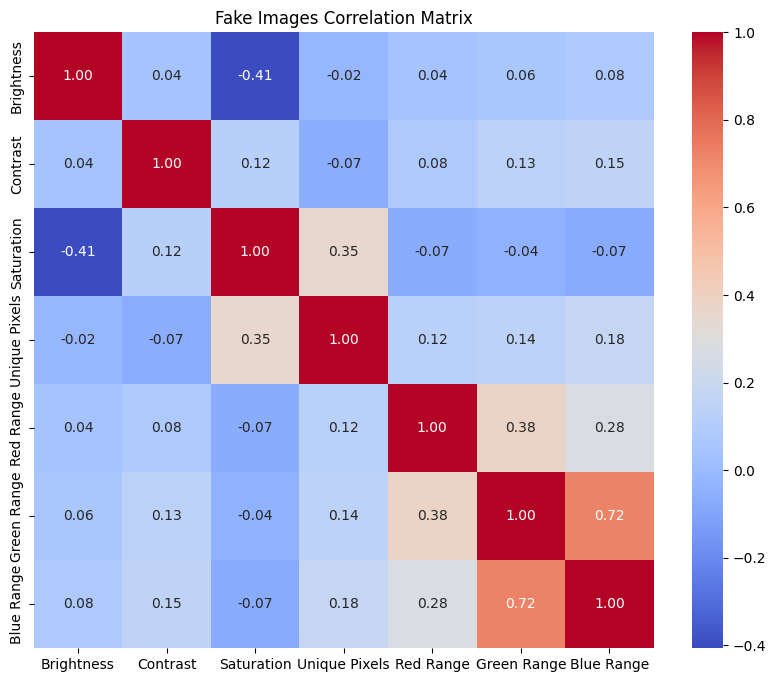

In [68]:
real_data = {
    'Brightness': real_brightness,
    'Contrast': real_contrast,
    'Saturation': real_saturation,
    'Unique Pixels': real_unique_pixels,
    'Red Range': [ranges[0] for ranges in real_color_range],
    'Green Range': [ranges[1] for ranges in real_color_range],
    'Blue Range': [ranges[2] for ranges in real_color_range],
}

fake_data = {
    'Brightness': fake_brightness,
    'Contrast': fake_contrast,
    'Saturation': fake_saturation,
    'Unique Pixels': fake_unique_pixels,
    'Red Range': [ranges[0] for ranges in fake_color_range],
    'Green Range': [ranges[1] for ranges in fake_color_range],
    'Blue Range': [ranges[2] for ranges in fake_color_range],
}

real_df = pd.DataFrame(real_data)
fake_df = pd.DataFrame(fake_data)

real_corr_matrix = real_df.corr()
fake_corr_matrix = fake_df.corr()

print("Real Images Correlation Matrix:")
print(real_corr_matrix.to_string())

print("\nFake Images Correlation Matrix:")
print(fake_corr_matrix.to_string())

plt.figure(figsize=(10, 8))
sns.heatmap(real_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Real Images Correlation Matrix")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(fake_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Fake Images Correlation Matrix")
plt.show()

# DATA PREPROCESING

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [70]:
scaler = StandardScaler()

data = {key: real_data[key] + fake_data[key] for key in real_data}
df = pd.DataFrame(data)

data_normalized = scaler.fit_transform(df)

pca = PCA(n_components=7)
principalComponents = pca.fit_transform(data_normalized)

principalDf = pd.DataFrame(data = principalComponents)

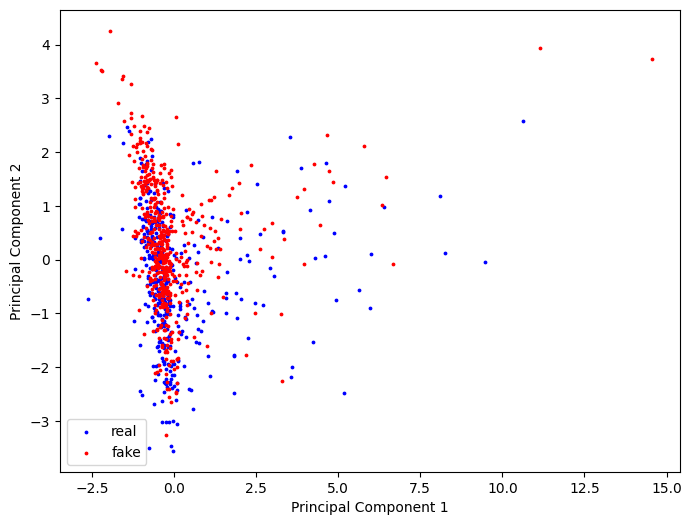

In [71]:
principalDf['label'] =  ['real'] *  len(next(iter(real_data.values())))+ ['fake'] * len(next(iter(fake_data.values())))

plt.figure(figsize=(8,6))
for label, color in zip(('real', 'fake'), ('blue', 'red')):
    mask = principalDf['label'] == label
    plt.scatter(principalDf.loc[mask, 0], principalDf.loc[mask, 1],s = 3, c=color, label=label)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# MODEL

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

### logit model with PCA

In [73]:
X = principalDf.drop('label', axis=1)
y = principalDf['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.63      0.77      0.69        96
        real       0.67      0.51      0.58        87

    accuracy                           0.64       183
   macro avg       0.65      0.64      0.63       183
weighted avg       0.65      0.64      0.64       183



### logit model with no PCA

In [74]:
df_normalized = pd.DataFrame(data_normalized, columns=df.columns)
df_normalized['label'] =  ['real'] *  len(next(iter(real_data.values())))+ ['fake'] * len(next(iter(fake_data.values())))

X = df_normalized.drop('label', axis=1)
y = df_normalized['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.63      0.77      0.69        96
        real       0.67      0.51      0.58        87

    accuracy                           0.64       183
   macro avg       0.65      0.64      0.63       183
weighted avg       0.65      0.64      0.64       183



### Random forrest (no pca)

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        fake       0.63      0.64      0.63        96
        real       0.59      0.59      0.59        87

    accuracy                           0.61       183
   macro avg       0.61      0.61      0.61       183
weighted avg       0.61      0.61      0.61       183



# Extract important features

In [76]:
importances = rf.feature_importances_

feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

feature_importances = feature_importances.sort_values('importance', ascending=False)

print(feature_importances)

         feature  importance
0     Brightness    0.265102
1       Contrast    0.207724
2     Saturation    0.206905
3  Unique Pixels    0.200629
6     Blue Range    0.044287
5    Green Range    0.043782
4      Red Range    0.031572


In [77]:
coefficients = logreg.coef_[0]

coeff_df = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})

print(coeff_df)

         feature  coefficient
0     Brightness     0.557452
1       Contrast     0.278304
2     Saturation    -0.161603
3  Unique Pixels    -0.213384
4      Red Range     0.010243
5    Green Range    -0.039534
6     Blue Range    -0.135369


# K - fold validation

In [78]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

results = pd.DataFrame(columns=['accuracy', 'precision', 'recall', 'f1_score'])

kf = KFold(n_splits=5, random_state=42, shuffle=True)

df['label'] = ['real'] *  len(next(iter(real_data.values())))+ ['fake'] * len(next(iter(fake_data.values())))
X = df.drop('label', axis=1)
y = df['label']

for train_index, test_index in tqdm(kf.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    rf = RandomForestClassifier(n_estimators=100, random_state=42)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results.loc[len(results)] = {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}


print(results)
print(results.mean())

5it [00:01,  2.52it/s]

   accuracy  precision    recall  f1_score
0  0.622951   0.622472  0.622951  0.622544
1  0.655738   0.655391  0.655738  0.652192
2  0.617486   0.624467  0.617486  0.609920
3  0.653846   0.656761  0.653846  0.655128
4  0.670330   0.668629  0.670330  0.668745
accuracy     0.644070
precision    0.645544
recall       0.644070
f1_score     0.641706
dtype: float64
